In [98]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import variation, f_oneway,kruskal
from statsmodels.graphics.gofplots import qqplot

In [99]:
root_dir = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(root_dir, "data/processed/data_cleaned.csv"))

/tmp/ipykernel_6133/2404526448.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root_dir, "data/processed/data_cleaned.csv"))


In [100]:
df.head(10)

,subject,gender,age,hand,x_coordinate,y_coordinate,timestamp,state,date,azimuth,altitude,pressure,control,session
0,T001,NaN,NaN,R,1493,9752,2098403,1,1970-01-01 12:34:58.403000,1990,720,6,N,u00005s00001_hw00001.svc
1,T001,NaN,NaN,R,1490,9752,2098411,1,1970-01-01 12:34:58.411000,1990,720,168,N,u00005s00001_hw00001.svc
2,T001,NaN,NaN,R,1490,9752,2098418,1,1970-01-01 12:34:58.418000,1990,720,328,N,u00005s00001_hw00001.svc
3,T001,NaN,NaN,R,1490,9752,2098426,1,1970-01-01 12:34:58.426000,1990,720,480,N,u00005s00001_hw00001.svc
4,T001,NaN,NaN,R,1489,9752,2098433,1,1970-01-01 12:34:58.433000,1990,720,667,N,u00005s00001_hw00001.svc
5,T001,NaN,NaN,R,1489,9752,2098441,1,1970-01-01 12:34:58.441000,1990,720,791,N,u00005s00001_hw00001.svc
6,T001,NaN,NaN,R,1489,9752,2098448,1,1970-01-01 12:34:58.448000,2020,720,889,N,u00005s00001_hw00001.svc
7,T001,NaN,NaN,R,1489,9752,2098456,1,1970-01-01 12:34:58.456000,2020,720,967,N,u00005s00001_hw00001.svc
8,T001,NaN,NaN,R,1489,9752,2098463,1,1970-01-01 12:34:58.463000,2020,720,1031,N,u00005s00001_hw00001.svc
9,T001,NaN,NaN,R,1488,9752,2098471,1,1970-01-01 12:34:58.471000,2020,720,1065,N,u00005s00001_hw00001.svc


In [101]:
df.describe()

,age,x_coordinate,y_coordinate,timestamp,state,azimuth,altitude,pressure
count,51060.000000,250802.000000,250802.000000,2.508020e+05,250802.000000,250802.000000,250802.000000,250802.000000
mean,42.698394,3836.949331,6376.095613,1.222163e+11,0.806258,1218.043197,673.766995,958.260943
std,13.403745,1890.954648,2679.231170,3.871606e+11,0.395230,1000.303596,134.801812,620.309786
min,22.000000,59.000000,1399.000000,1.264550e+05,0.000000,0.000000,220.000000,0.000000
25%,32.000000,1770.000000,3820.000000,1.777883e+06,1.000000,340.000000,570.000000,488.000000
50%,48.000000,4592.000000,6797.000000,2.633750e+06,1.000000,940.000000,690.000000,1067.000000
75%,52.000000,5411.000000,8593.000000,5.482293e+06,1.000000,1900.000000,770.000000,1369.000000
max,62.000000,7198.000000,12317.000000,1.363796e+12,1.000000,3590.000000,900.000000,2048.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250802 entries, 0 to 250801
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   subject       250802 non-null  object 
 1   gender        51060 non-null   object 
 2   age           51060 non-null   float64
 3   hand          250802 non-null  object 
 4   x_coordinate  250802 non-null  int64  
 5   y_coordinate  250802 non-null  int64  
 6   timestamp     250802 non-null  int64  
 7   state         250802 non-null  int64  
 8   date          250802 non-null  object 
 9   azimuth       250802 non-null  int64  
 10  altitude      250802 non-null  int64  
 11  pressure      250802 non-null  int64  
 12  control       250802 non-null  object 
 13  session       250802 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 26.8+ MB


In [103]:
unique_subjects = df['subject'].drop_duplicates()

# Total number of unique subjects
num_subjects = unique_subjects.nunique()

# Number of healthy subjects (control == 'Y')
healthy_subjects = df[df['control'] == 'Y']['subject'].drop_duplicates().nunique()

# Number of sick subjects (control == 'N')
sick_subjects = df[df['control'] == 'N']['subject'].drop_duplicates().nunique()

print(f"Total number of unique subjects: {num_subjects}")
print(f"Number of healthy subjects: {healthy_subjects}")
print(f"Number of PD subjects: {sick_subjects}")

Total number of unique subjects: 32
Number of healthy subjects: 10
Number of PD subjects: 22


In [104]:
# All sessions
len(list(df['session'].unique()))

108

In [105]:
# Number of sessions for healthy subjects (control == 'Y')
healthy_sessions = df[df['control'] == 'Y']['session'].nunique()

# Number of sessions for sick subjects (control == 'N')
sick_sessions = df[df['control'] == 'N']['session'].nunique()

# Print the results
print(f"Number of sessions for the healthy subjects: {healthy_sessions}")
print(f"Number of sessions for the PD subjects: {sick_sessions}")

Number of sessions for the healthy subjects: 20
Number of sessions for the PD subjects: 90


In [106]:
df["x_coordinate"].isna().sum(), df["y_coordinate"].isna().sum()

(0, 0)

In [107]:
len(df[(df["altitude"] == 0) & (df["azimuth"] == 0) & (df["pressure"] == 0)])

0

In [108]:
len(df[(df["state"] == 0) & (df["pressure"] != 0)])

0

In [109]:
missing_no = df.isnull().sum()
missing_no = missing_no[missing_no > 0]
print(f"There are {len(missing_no)} variables which contain an X number of missing (NaN or Null) values: \n{missing_no.to_string()}")

There are 2 variables which contain an X number of missing (NaN or Null) values: 
gender    199742
age       199742


In [110]:
for var, num in missing_no.items():
    total_no = len(df[f"{var}"])
    percent = (num / total_no) * 100
    print(f"{var}\t{round(percent,2)}%".expandtabs(15))

gender         79.64%
age            79.64%


In [111]:
filtered_data = df[(df['x_coordinate'] == 0) & (df['y_coordinate'] == 0)]
grouped_data = filtered_data.groupby(['subject', 'session']).size()
print(f"There are {len(grouped_data)} sessions that have spirals positioned at (0,0)")

There are 0 sessions that have spirals positioned at (0,0)


In [112]:
df['x_coordinate'] = pd.to_numeric(df['x_coordinate'], errors='coerce')
df['y_coordinate'] = pd.to_numeric(df['y_coordinate'], errors='coerce')
df["date"] = pd.to_datetime(df["date"])
df["timestamp"] = df["date"].dt.time.astype(str)


In [113]:
def create_metrics(df):
    df_temp = df.copy()
    grouping_vars = ['subject','session']
    df_temp["dx"] = df_temp.groupby(grouping_vars)["x_coordinate"].diff()
    df_temp["dy"] = df_temp.groupby(grouping_vars)["y_coordinate"].diff()
    df_temp["delta_altitude"] = df_temp.groupby(grouping_vars)["altitude"].diff().abs()
    df_temp["delta_pressure"] = df_temp.groupby(grouping_vars)["pressure"].diff().abs()
    df_temp["delta_azimuth"] = df_temp.groupby(grouping_vars)["azimuth"].diff().abs()
    # Calculate the delta distance as the Euclidean distance for each group
    df_temp["distance"] = np.sqrt(df_temp["dx"] ** 2 + df_temp["dy"] ** 2)
    # Compute time difference in seconds
    df_temp["dt"] = pd.to_datetime(df_temp["date"]).diff().dt.total_seconds()
    # Calculate speed
    df_temp["speed"] = df_temp["distance"] / df_temp["dt"]
    return df_temp
df = create_metrics(df)
    # Convert the class to numeric (0 for non-control, 1 for control)
df["control_numeric"] = (df["control"] == "N").astype(int)
df.head()

,subject,gender,age,hand,x_coordinate,y_coordinate,timestamp,state,date,azimuth,...,session,dx,dy,delta_altitude,delta_pressure,delta_azimuth,distance,dt,speed,control_numeric
0,T001,NaN,NaN,R,1493,9752,12:34:58.403000,1,1970-01-01 12:34:58.403,1990,...,u00005s00001_hw00001.svc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,T001,NaN,NaN,R,1490,9752,12:34:58.411000,1,1970-01-01 12:34:58.411,1990,...,u00005s00001_hw00001.svc,-3.0,0.0,0.0,162.0,0.0,3.0,0.008,375.000000,1
2,T001,NaN,NaN,R,1490,9752,12:34:58.418000,1,1970-01-01 12:34:58.418,1990,...,u00005s00001_hw00001.svc,0.0,0.0,0.0,160.0,0.0,0.0,0.007,0.000000,1
3,T001,NaN,NaN,R,1490,9752,12:34:58.426000,1,1970-01-01 12:34:58.426,1990,...,u00005s00001_hw00001.svc,0.0,0.0,0.0,152.0,0.0,0.0,0.008,0.000000,1
4,T001,NaN,NaN,R,1489,9752,12:34:58.433000,1,1970-01-01 12:34:58.433,1990,...,u00005s00001_hw00001.svc,-1.0,0.0,0.0,187.0,0.0,1.0,0.007,142.857143,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250802 entries, 0 to 250801
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   subject          250802 non-null  object        
 1   gender           51060 non-null   object        
 2   age              51060 non-null   float64       
 3   hand             250802 non-null  object        
 4   x_coordinate     250802 non-null  int64         
 5   y_coordinate     250802 non-null  int64         
 6   timestamp        250802 non-null  object        
 7   state            250802 non-null  int64         
 8   date             250802 non-null  datetime64[ns]
 9   azimuth          250802 non-null  int64         
 10  altitude         250802 non-null  int64         
 11  pressure         250802 non-null  int64         
 12  control          250802 non-null  object        
 13  session          250802 non-null  object        
 14  dx               250

In [115]:
def aggregate_features(df_input):
    variability_data = []
    # Iterate over subjects
    for subject in df_input.subject.unique():
        subject_df = df_input[df_input.subject == subject]
        # Iterate over sessions for each subject
        for session in subject_df.session.unique():
            session_df = subject_df[
                (subject_df.session == session) & (subject_df.subject == subject)
            ]
            # Calculate variability (coefficient of variation) for speed
            speed_variability = variation(session_df["speed"].dropna())
            
            # Collect the information (session, subject, and speed variability)
            variability_data.append({
                "subject": subject,
                "session": session,
                "speed_variability": speed_variability
            })

    # Convert the variability data into a DataFrame
    variability_df = pd.DataFrame(variability_data)
    # Group by subject, session, and control, and calculate mean values for other features
    mean_df = df_input.groupby(['subject','session','control']).agg({
        "altitude":'mean',
        "pressure":'mean',
        "azimuth":'mean',        
        "delta_altitude":'mean',
        "delta_pressure":'mean',
        "delta_azimuth":'mean',
        "distance":'mean',
        "speed":'mean',
    }).reset_index()

    # Merge the variability_df with mean_df on subject and session
    merged_df = pd.merge(mean_df, variability_df, on=["subject", "session"], how="left")
    return merged_df
df_aggregated = aggregate_features(df)
df_aggregated["control_numeric"] = (df_aggregated["control"] == "N").astype(int)
df_aggregated.head()

,subject,session,control,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,distance,speed,speed_variability,control_numeric
0,C01,u00003s00002_hw000011.svc,Y,744.736842,1641.735324,3372.130567,0.779747,84.056203,7.103797,9.776798,1306.601579,0.353673,0
1,C01,u00003s00002_hw000012.svc,Y,817.502444,1003.782991,1941.793744,0.767726,70.984841,7.413203,9.048493,1209.206531,0.328152,0
2,C02,u00004s00001_hw000011.svc,Y,748.940962,1014.970785,3194.357882,0.883069,29.577345,18.666261,10.610512,1418.329782,0.307090,0
3,C02,u00004s00001_hw000012.svc,Y,799.971469,936.285307,1673.128864,1.046622,45.383444,6.308278,8.877929,1186.444942,0.384199,0
4,C03,u00005s00001_hw000011.svc,Y,759.467397,1108.660030,694.639124,0.806773,35.937251,14.203187,8.461535,1130.810308,0.283591,0


In [46]:
# Split the dataset into all controlled and non control patients
controlled = df.loc[df['control'] == 'Y']
noncontrolled = df.loc[df['control'] == 'N']

In [47]:
control_df= df[(df.subject == "C01") & (df.session == "u00003s00002_hw000011.svc")].reset_index(drop=True)
non_control_df = df[(df.subject == "T001") & (df.session == "u00005s00001_hw00001.svc")].reset_index(drop=True)

In [48]:
def plot_drawing(df):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['x_coordinate'], df['y_coordinate'], s=2)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Handwritten Spirals')
    plt.show()

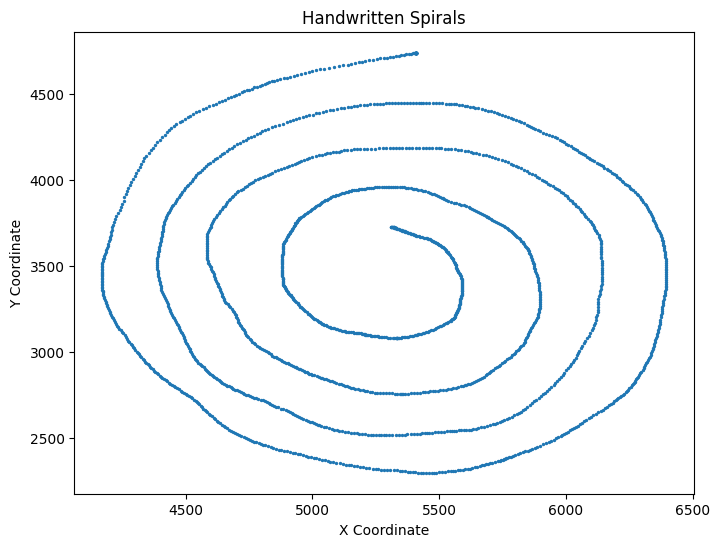

In [49]:
plot_drawing(control_df)

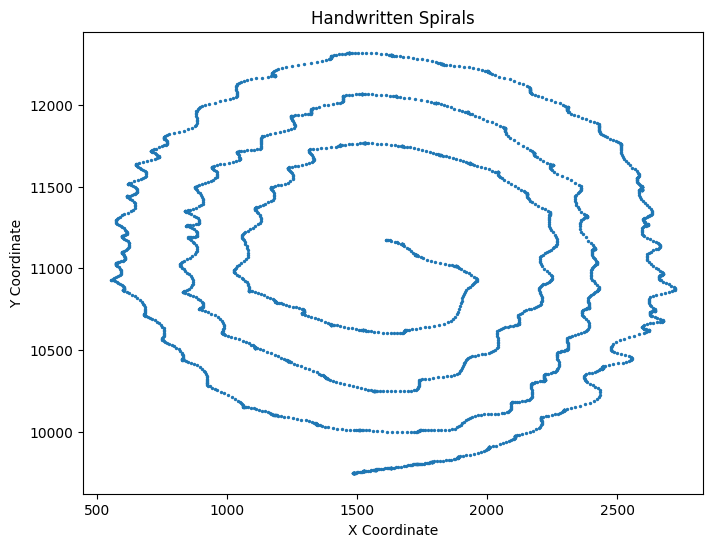

In [50]:
plot_drawing(non_control_df)

# Delta features

In [51]:
# Calculating the difference of altitude between the coordinates for the specified sessions
def plot_delta_altitude(df):
    plt.figure(figsize=(10, 6))
    time_step = np.arange(len(df["delta_altitude"]))
    plt.plot(time_step, df["delta_altitude"])
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta altitude')
    plt.title(f'Delta altitude over time by session')

# Calculating the difference of azimuth between the coordinates for the specified sessions
def plot_delta_azimuth(df):
    plt.figure(figsize=(10, 6))
    time_step = np.arange(len(df["delta_azimuth"]))
    plt.plot(time_step, df["delta_azimuth"])
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta azimuth')
    plt.title(f'Delta azimuth over time by session')

# Calculating the difference of pressure between the coordinates for the specified sessions
def plot_delta_pressure(df):
    plt.figure(figsize=(10, 6))
    time_step = np.arange(len(df["delta_pressure"]))
    plt.plot(time_step, df["delta_pressure"])
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta pressure')
    plt.title(f'Delta pressure over time by session')


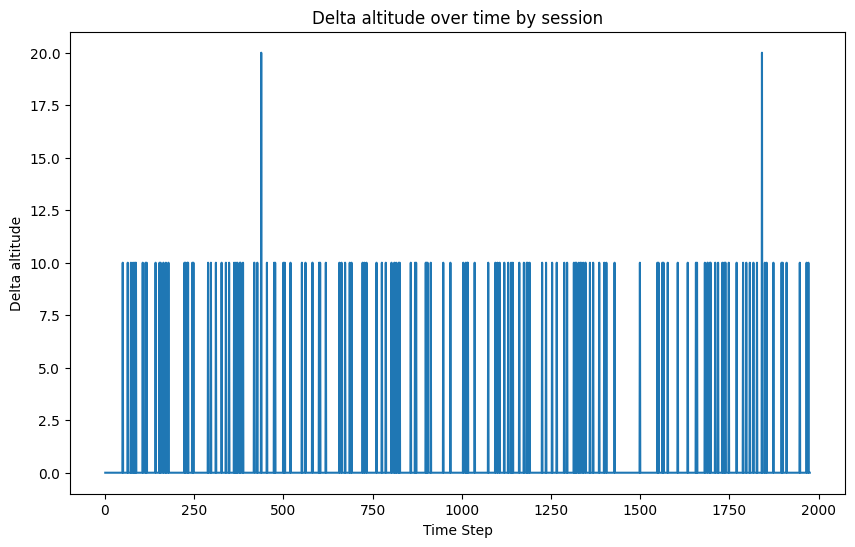

In [52]:
plot_delta_altitude(control_df)

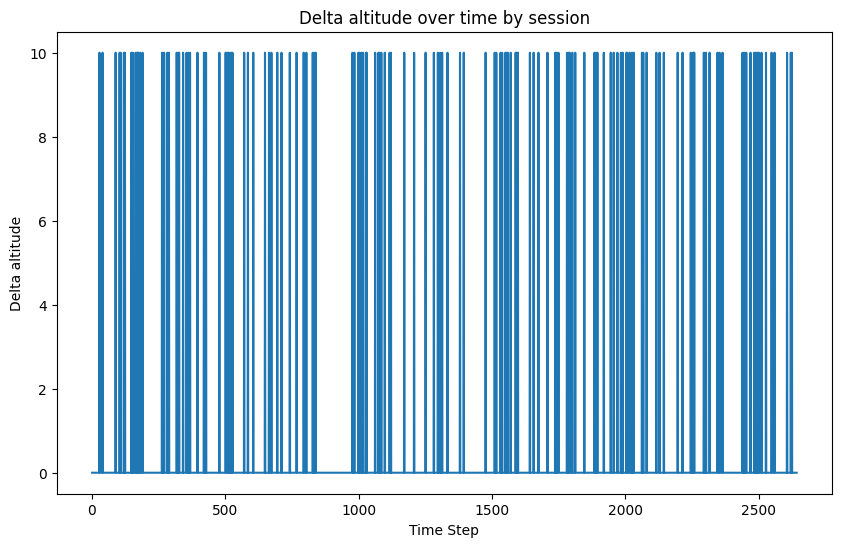

In [53]:
plot_delta_altitude(non_control_df)

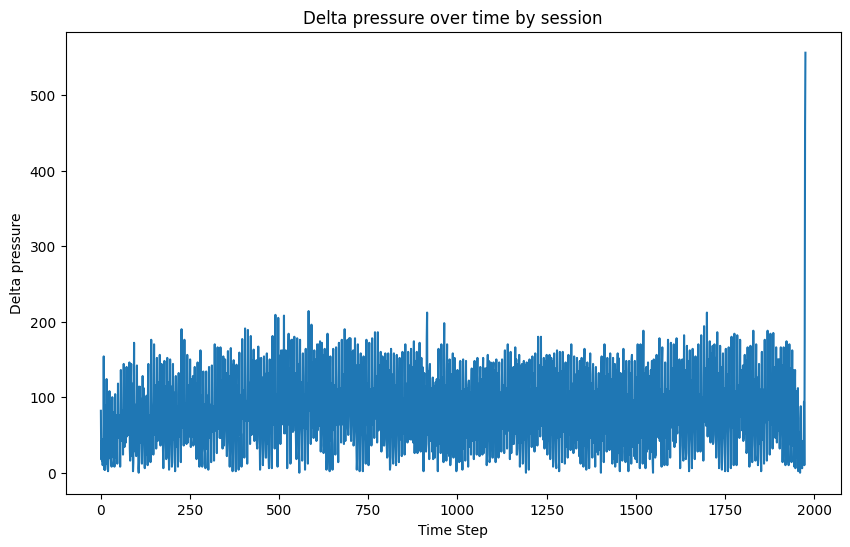

In [54]:
plot_delta_pressure(control_df)

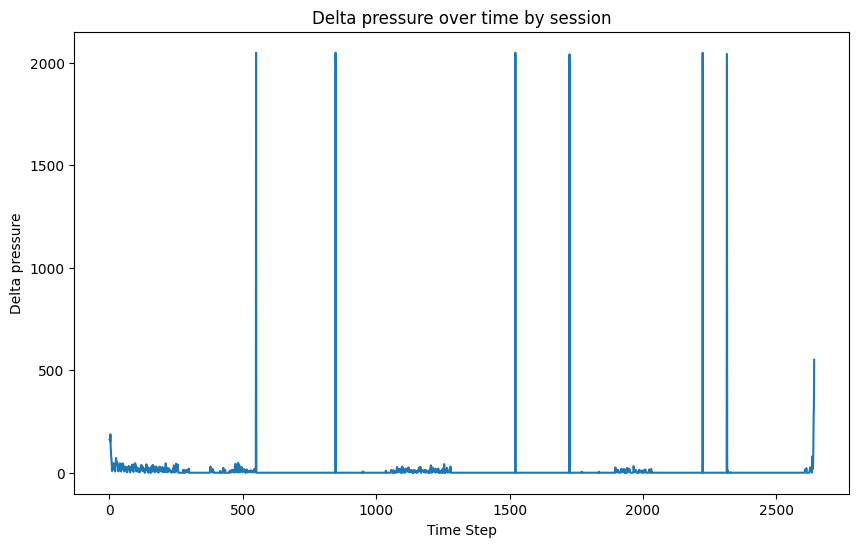

In [55]:
plot_delta_pressure(non_control_df)

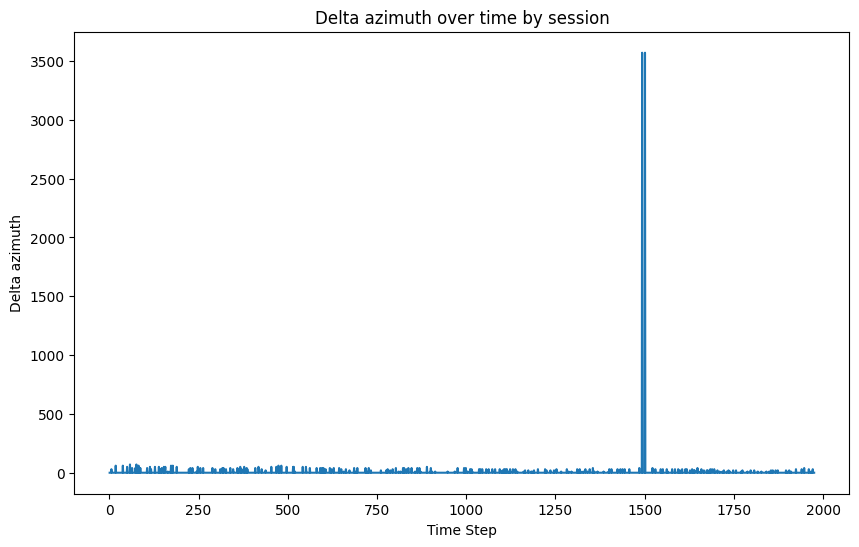

In [56]:
plot_delta_azimuth(control_df)

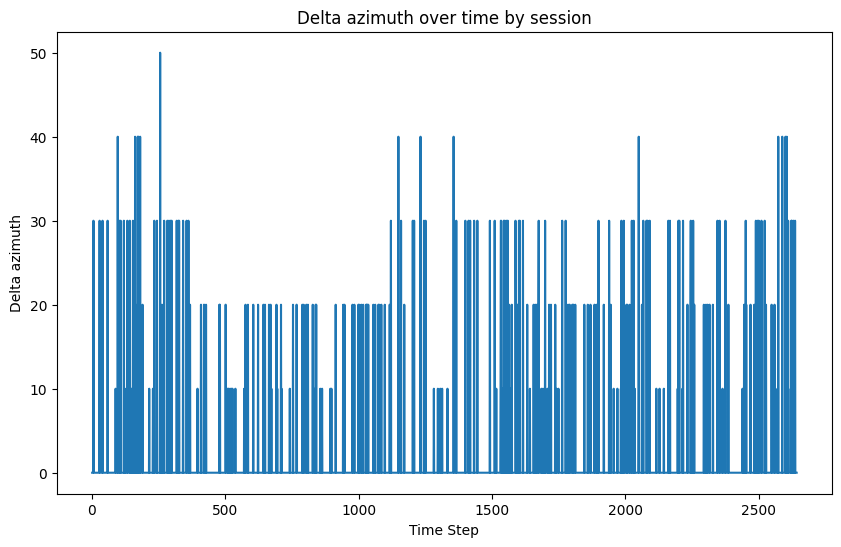

In [57]:
plot_delta_azimuth(non_control_df)

# Drawing Speed

In [78]:
df_aggregated.head()

,subject,session,control,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,distance,speed,speed_variability
0,C01,u00003s00002_hw000011.svc,Y,744.736842,1641.735324,3372.130567,0.779747,84.056203,7.103797,9.776798,1306.601579,0.353673
1,C01,u00003s00002_hw000012.svc,Y,817.502444,1003.782991,1941.793744,0.767726,70.984841,7.413203,9.048493,1209.206531,0.328152
2,C02,u00004s00001_hw000011.svc,Y,748.940962,1014.970785,3194.357882,0.883069,29.577345,18.666261,10.610512,1418.329782,0.307090
3,C02,u00004s00001_hw000012.svc,Y,799.971469,936.285307,1673.128864,1.046622,45.383444,6.308278,8.877929,1186.444942,0.384199
4,C03,u00005s00001_hw000011.svc,Y,759.467397,1108.660030,694.639124,0.806773,35.937251,14.203187,8.461535,1130.810308,0.283591


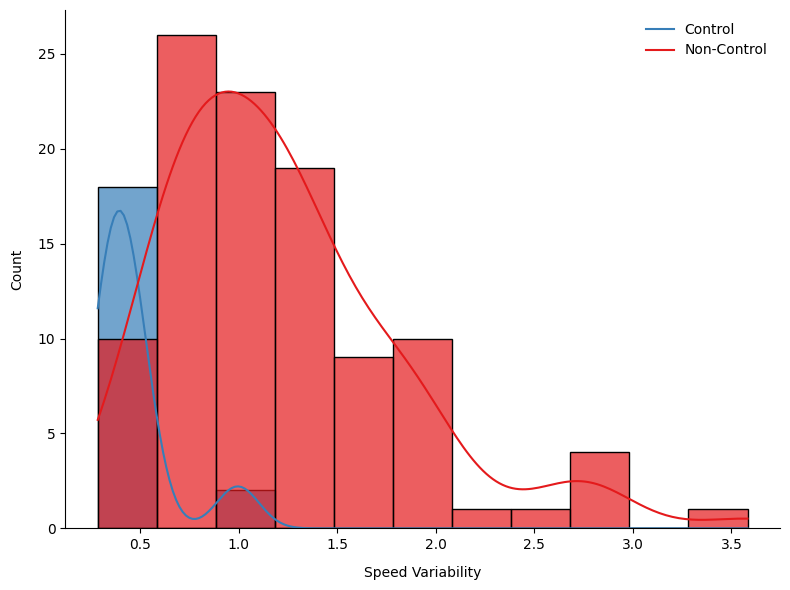

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))

hue_order = [1, 0] 
legend_labels = {0: 'Non-Control', 1: 'Control'}
sns.histplot(df_aggregated, x="speed_variability", hue="control_numeric", kde=True, palette="Set1", alpha=0.7,  hue_order=hue_order)
plt.xlabel("Speed Variability", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.legend(labels=[legend_labels[i] for i in hue_order], frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

## Checking the normality for each feature

In [342]:
# qqplot(controlled[["daltitude"]], line='s')

## Compute Kruskal Wallis tests

In [343]:
def compute_mean_features(df_control, df_noncontrol, feature_name="altitude"):  
    df_control = df_control[[feature_name, "session", "control"]]
    df_noncontrol = df_noncontrol[[feature_name, "session", "control"]]
    df_control_mean = df_control.groupby(['session','control']).agg({
        feature_name:'mean'
    }).reset_index()
    df_noncontrol_mean = df_noncontrol.groupby(['session','control']).agg({
        feature_name:'mean'
    }).reset_index()
    return df_control_mean, df_noncontrol_mean

In [344]:
feature_name = "delta_altitude"
daltitude_control_mean, daltitude_noncontrol_mean = compute_mean_feature(controlled, noncontrolled, feature_name)
daltitude_control_mean.shape, daltitude_noncontrol_mean.shape

NameError: name 'compute_mean_feature' is not defined

In [163]:
kruskal(daltitude_control_mean[feature_name],daltitude_noncontrol_mean[feature_name])

KruskalResult(statistic=0.6467049811033411, pvalue=0.4212932039846151)

In [95]:
# def delta_dictionary(dataset, session_column, feature_column, data_sessions, dictionary_name):
#     for session in data_sessions:
#         session_data = dataset[dataset[session_column] == session]  # Filter data for the session
#         delta = [] 
#         for j in range(0, len(session_data) - 1):
#             begin = session_data[feature_column].iloc[j]   
#             end = session_data[feature_column].iloc[j + 1]
#             delta_feature = abs(end - begin)
#             delta.append(delta_feature)
#         dictionary_name[session] = delta  # Store the list of changes in the dictionary
      

In [96]:
# # Get the session codes for controlled and uncontrolled
# controlled_sessions = controlled['session'].unique()
# uncontrolled_sessions = noncontrolled['session'].unique()


# pressure_changes_by_session_uncontrolled={}
# pressure_changes_by_session_controlled={}
# #populate pressure dictionary for uncontrolled 
# delta_dictionary(noncontrolled,'session','pressure',uncontrolled_sessions,pressure_changes_by_session_uncontrolled)
# #populate pressure dictionary for controlled:
# delta_dictionary(controlled,'session','pressure',controlled_sessions,pressure_changes_by_session_controlled)

# #Turn dictionary into dataframe
# pressure_changes_by_session_controlled_df=pd.DataFrame.from_dict(pressure_changes_by_session_controlled,orient='index').transpose()
# pressure_changes_by_session_uncontrolled_df=pd.DataFrame.from_dict(pressure_changes_by_session_uncontrolled,orient='index').transpose()

# #melt dataframe to convert columns into row.
# pressure_changes_by_session_controlled_df_melted=pd.melt(pressure_changes_by_session_controlled_df,var_name='Session',value_name='Delta_pressure')
# #print(pressure_changes_by_session_controlled_df_melted.shape)
# pressure_changes_by_session_controlled_df_melted.dropna(inplace=True)

# pressure_changes_by_session_uncontrolled_df_melted=pd.melt(pressure_changes_by_session_uncontrolled_df,var_name='Session',value_name='Delta_pressure')
# pressure_changes_by_session_uncontrolled_df_melted.dropna(inplace=True)
# # print(pressure_changes_by_session_uncontrolled_df_melted.shape)

# #Add column 
# no_list=np.repeat('N',len(pressure_changes_by_session_uncontrolled_df_melted))
# pressure_changes_by_session_uncontrolled_df_melted['control']='N'
# pressure_changes_by_session_controlled_df_melted['control']='Y'
# #Merge 2 dataframes 
# delta_pressure=pd.concat([pressure_changes_by_session_controlled_df_melted,pressure_changes_by_session_uncontrolled_df_melted],axis=0)
# delta_pressure